# Tugas Event 2 : Solving Real Problems with Data Science

    nama : I Putu Andika Bagas Jiwanta
    NIM : 16520313
    Universitas : ITB
    Tanggal mulai : 10 November 2020
    Dataset : country_wise_latest
    Sumber data : https://www.kaggle.com/imdevskp/corona-virus-report

## Country_wise_latest

    Data ini berisi tentang informasi mengenai covid di hampir setiap negara
    Data diupload per hari oleh pemiliknya dan data yang saya gunakan disini terakhir pada tanggal 14 November 2020

## Data observation and preparation

    Pada analisis ini, saya akan menganalisis hubungan-hubungan naik dan turunnya covid khusus di asia tenggara
    dan membuat model yang menganalisis berapa tambahan kasus minggu ini dengan rasio 80 persen untuk training
    dan 20 persen untuk testing
   

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Inserting data
df = pd.read_csv('country_wise_latest.csv')

## Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

#### Data kita tidak memiliki nilai null, sehingga tidak perlu cleaning alias data sudah bersih 

In [4]:
#melihat data
df.head(6)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas


In [5]:
# Melihat statistik dasar dari data
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


## Data Visualization

Grafik 1 sembuh terhadap jumlah kasus


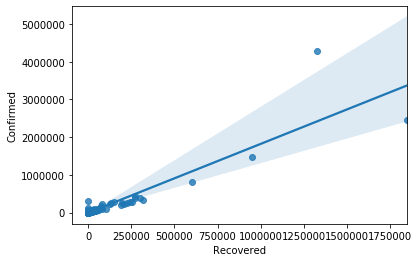

In [6]:
sns.regplot( x = "Recovered" , y = "Confirmed" , data = df)
print('Grafik 1 sembuh terhadap jumlah kasus')

Grafik 2 kematian terhadap jumlah kasus


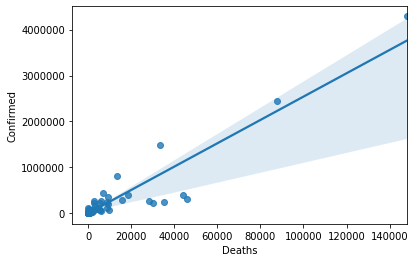

In [7]:
sns.regplot( x = "Deaths" , y = "Confirmed" , data = df)
print('Grafik 2 kematian terhadap jumlah kasus')

Grafik 3, persentase kematian tiap region


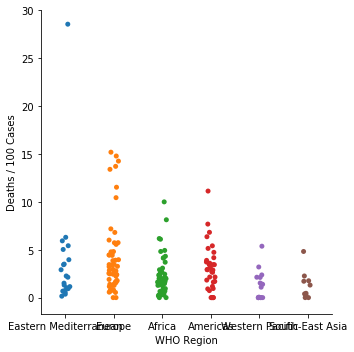

In [10]:
sns.catplot(x = 'WHO Region', y = 'Deaths / 100 Cases', data = df)
print("Grafik 3, persentase kematian tiap region")

Grafik 4, Persentase sembuh per region


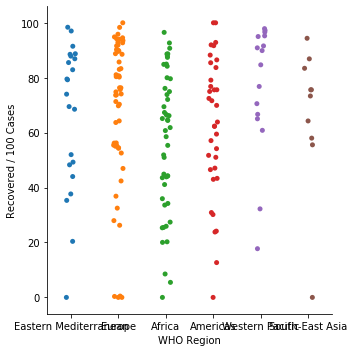

In [11]:
sns.catplot(x = 'WHO Region', y = 'Recovered / 100 Cases', data = df)
print("Grafik 4, Persentase sembuh per region")

## Presentation 

    Dari grafik 1 dan 2 diatas, diambil beberapa kesimpulan :
    Kemiringan grafik kematian masih lebih besar daripada kemiringan dari grafik sembuh 
    hal ini berarti pandemi Covid 19 masih belum dalam kendali manusia 
    
    Dari grafik 3 dan 4 diatas, dapat diambil beberapa kesimpulan :
    1. Wilayah eropa, afrika, dan amerika masih memiliki jumlah kematian yang cukup tinggi dibandingkan
    dengan daerah lainnya
    2. Wilayah timur tengah, eropa, afrika, dan amerika masih kurang dalam hal penyembuhan kasus
    3. Wilayah Pasifik dan Asia tenggara terbilang cukup baik dalam menangani kasus covid 